In [2]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import matplotlib # collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Python version: 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
NumPy version: 1.26.0
pandas version: 2.1.1
matplotlib version: 3.8.0


In [3]:
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

In [4]:
df.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [8]:
df['age'].describe()# here in age we see that there is no missing values , as in df.info() we get 1025 and in describe also we get 1025

# HERE THE 25% 50% ... ARE THE FIRST SECOND THIRD QUAARTILE , WE CAN ALSO CALCUALTE IQR(INTER QUARTILE RANGE) THIRD -FIRST 61-48

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

In [9]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [10]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

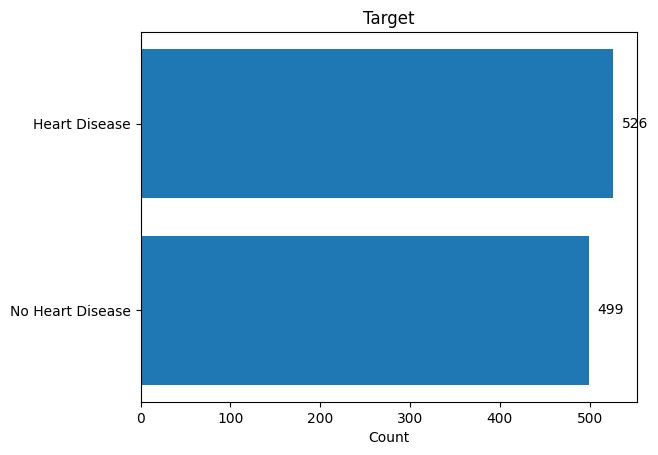

In [11]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Heart Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()


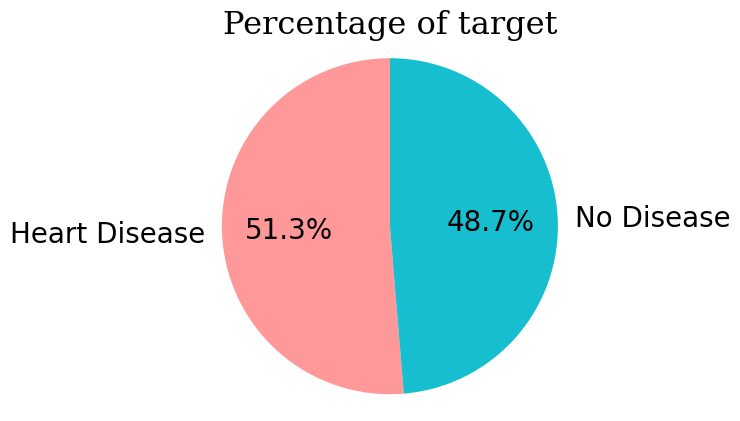

In [12]:
import matplotlib.pyplot as plt
font={'family':'serif','size':23,'color':'black'}
colors = ['#ff9999','#17becf']
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 20},colors=colors) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', fontdict=font)
plt.show()

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [15]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
quantitative

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

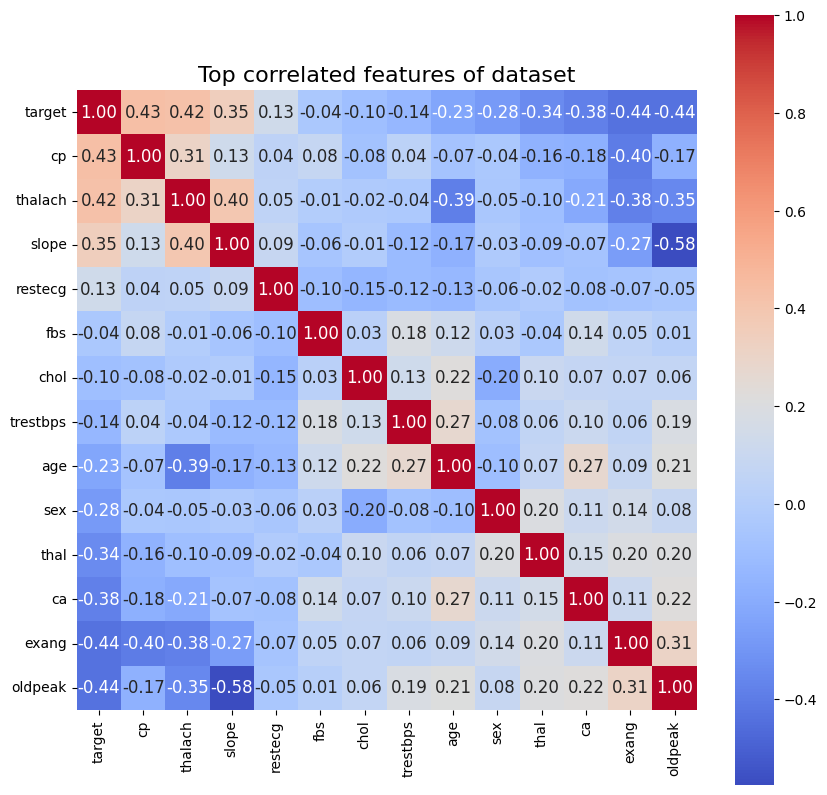

In [17]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'target')['target'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()

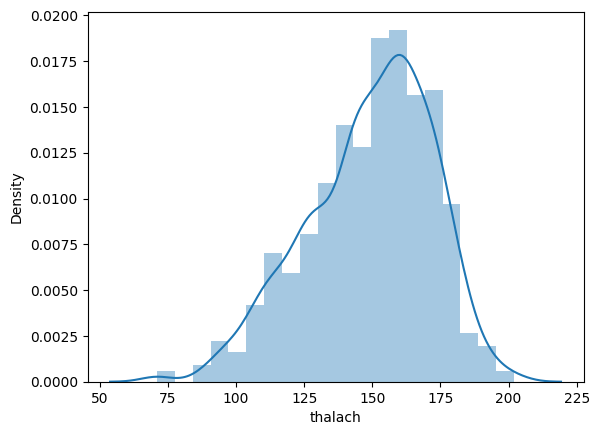

In [18]:
ax = sns.distplot(df['thalach'])

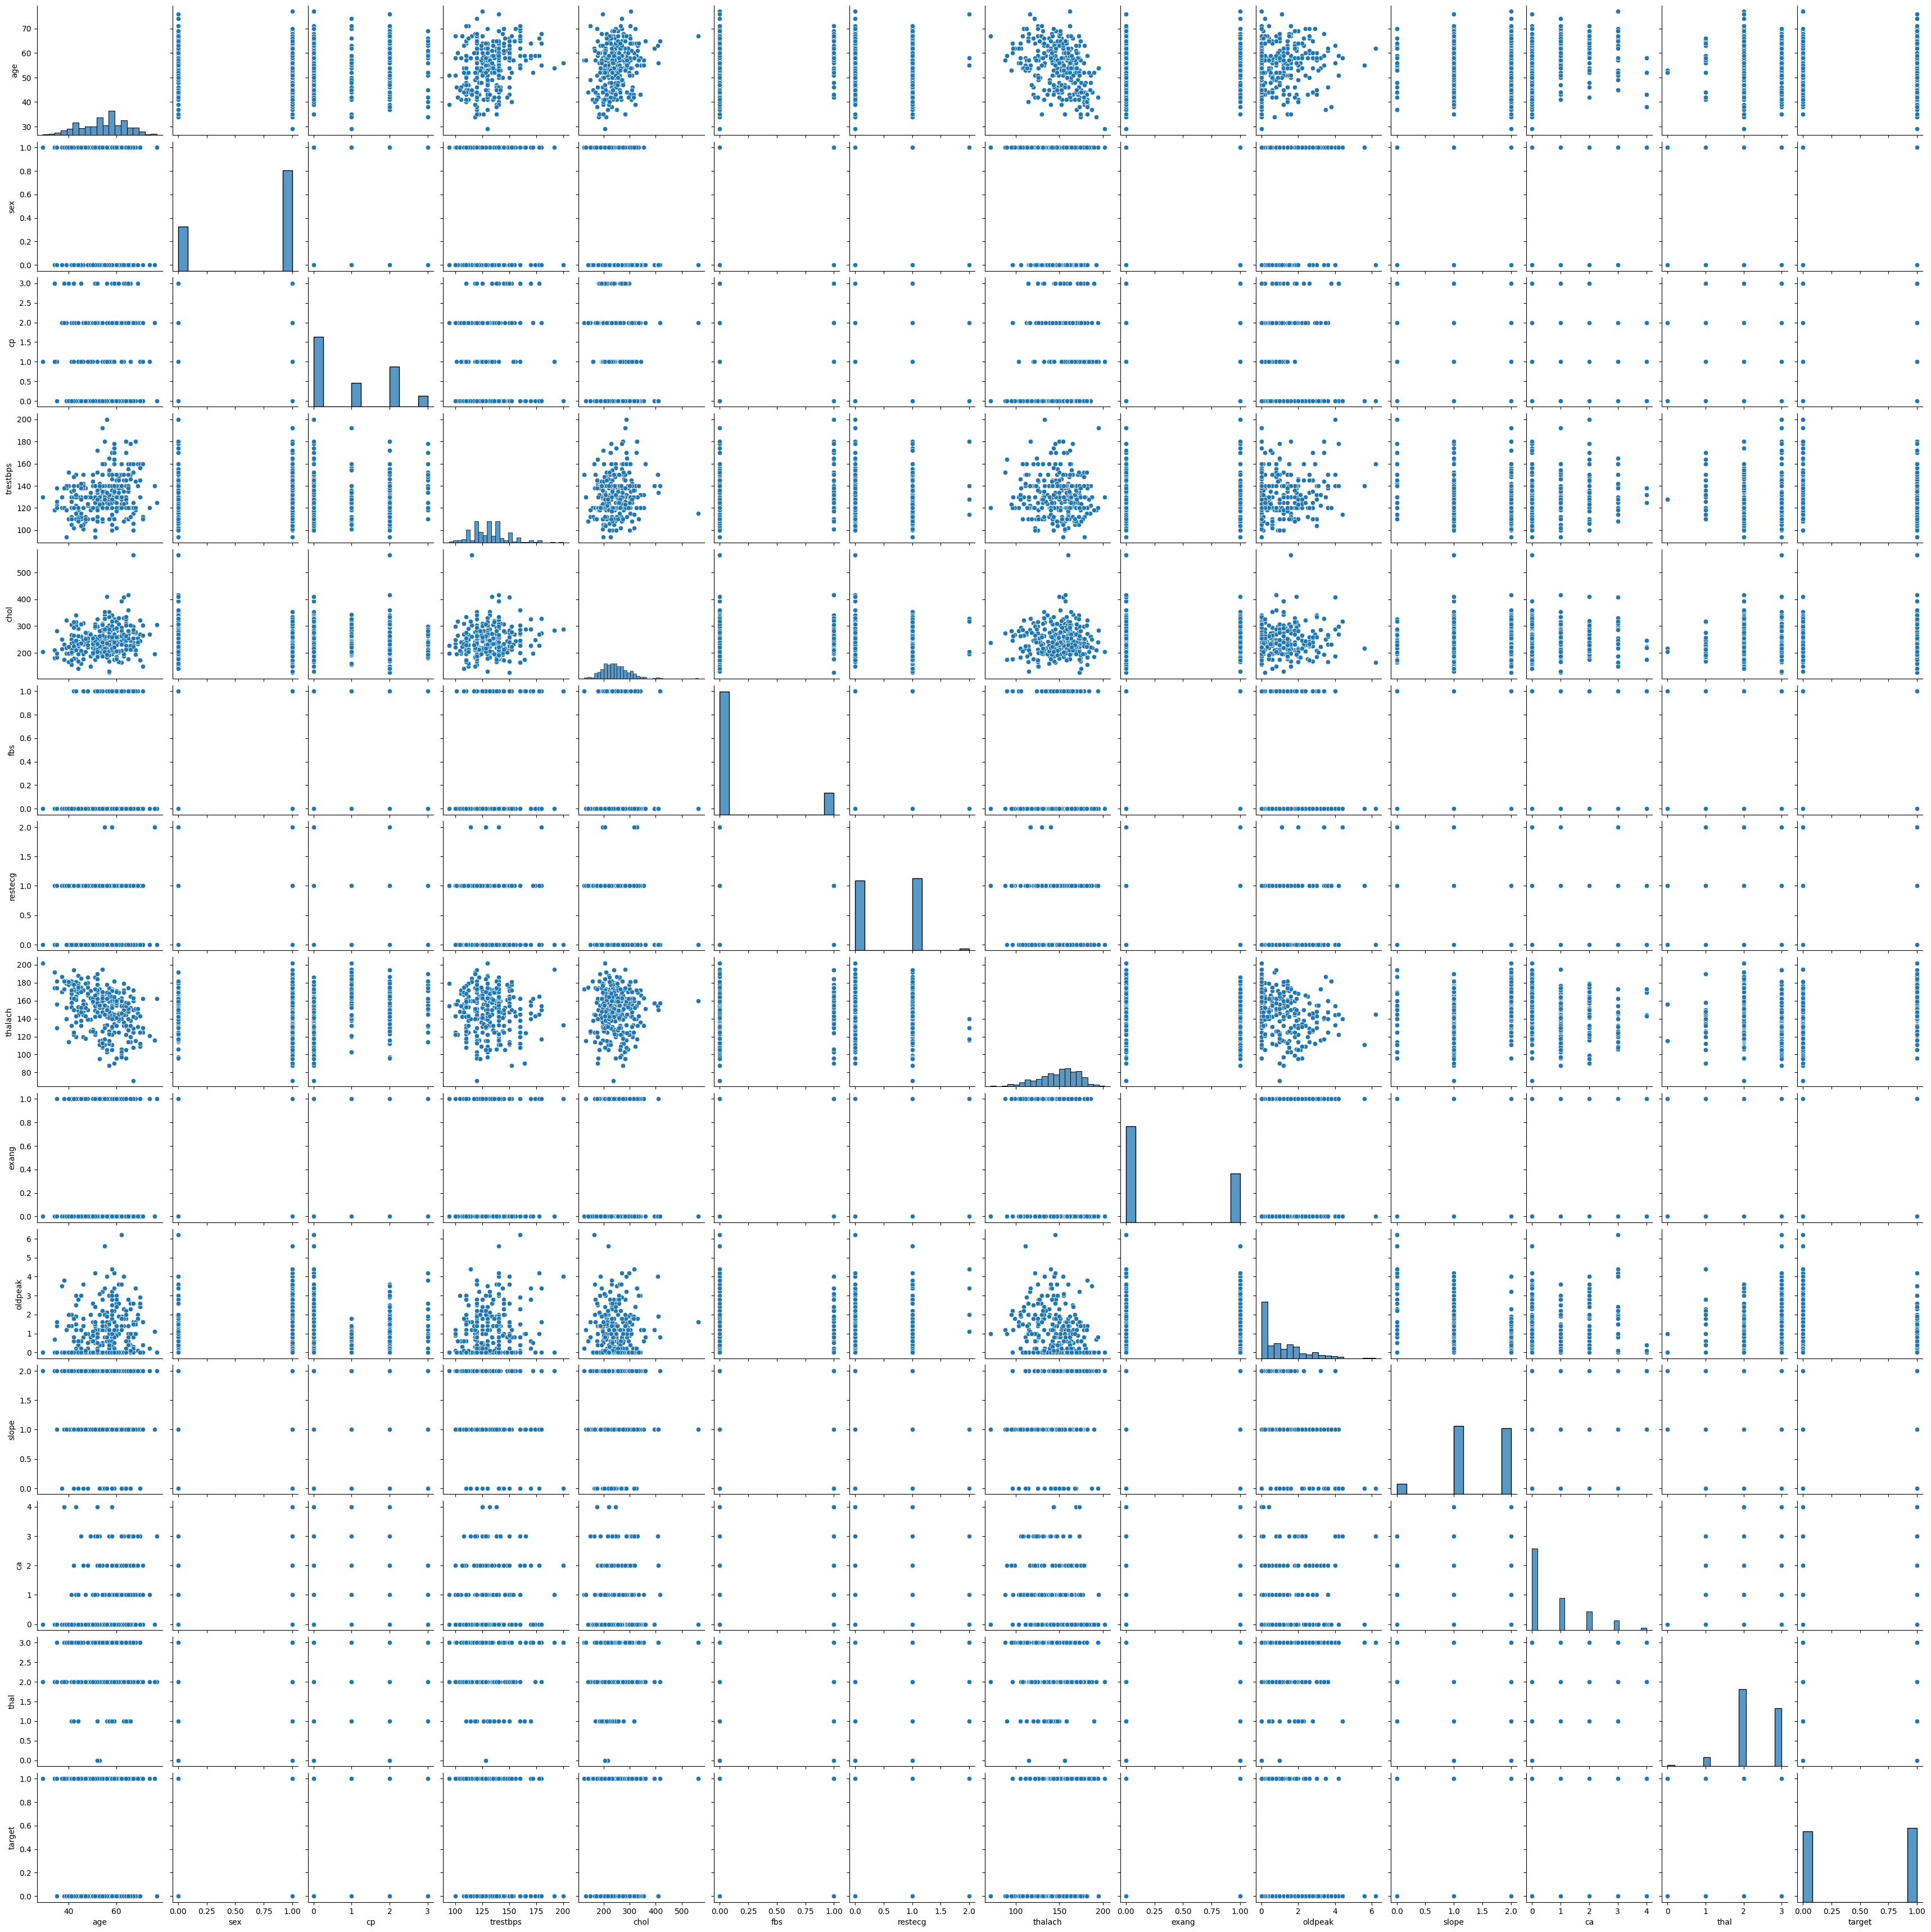

In [19]:
sns.pairplot(df)

In [20]:
X = df.drop('target',axis=1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (1025, 13) (1025,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (820, 13) (820,)
shape of X and y respectively (test) : (205, 13) (205,)


In [22]:
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_logreg = score
out_logreg = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Logistic Regression
Training Score: 0.8621951219512195
Testing Score: 0.8634146341463415
   Predicted
0          1
1          1
2          0
3          1
4          0
% of people predicted with heart-disease: 0.5902439024390244
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



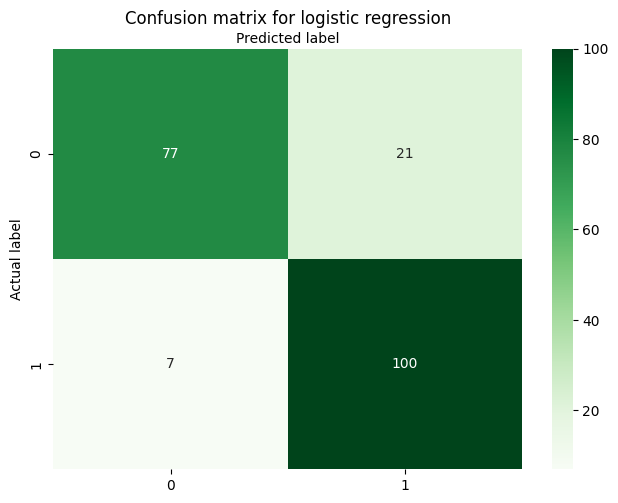

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

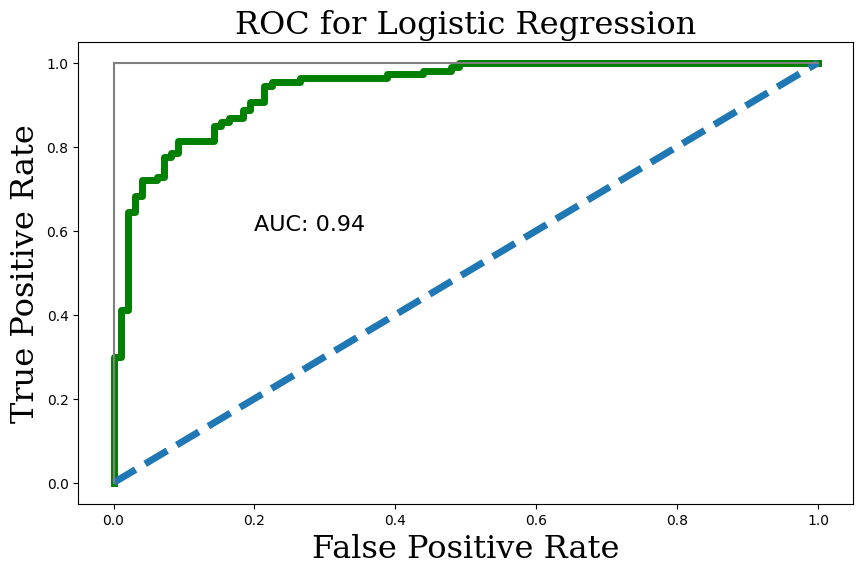

In [24]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
font={'family':'serif','size':23,'color':'black'}
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Logistic Regression',fontdict=font)
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate',fontdict=font)
plt.ylabel('True Positive Rate',fontdict=font)
plt.show()

In [25]:
print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5) 
decision_tree.fit(X_train, y_train)  
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_dtc = score
out_dtc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

DecisionTreeClassifier
Training Score: 0.8621951219512195
Testing Score: 0.8634146341463415
   Predicted
0          1
1          1
2          0
3          1
4          0
% of people predicted with heart-disease: 0.5902439024390244
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



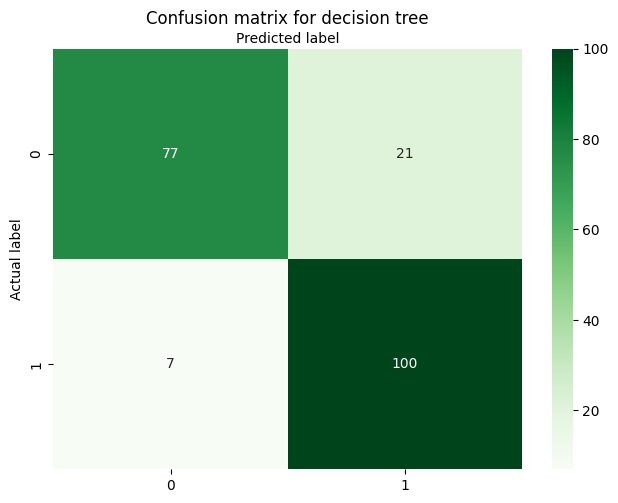

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

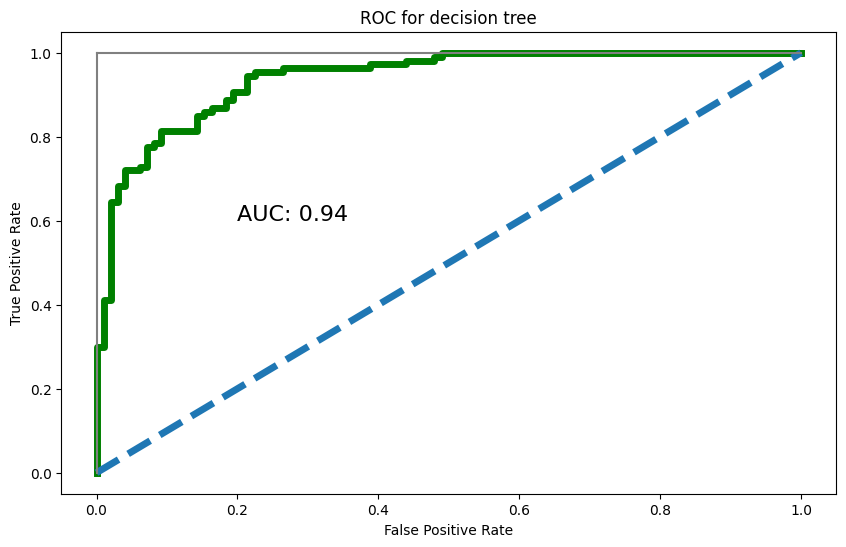

In [27]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [28]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 1.0
Testing Score: 1.0
   Predicted
0          1
1          0
2          0
3          1
4          0
% of people predicted with heart-disease: 0.5219512195121951
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



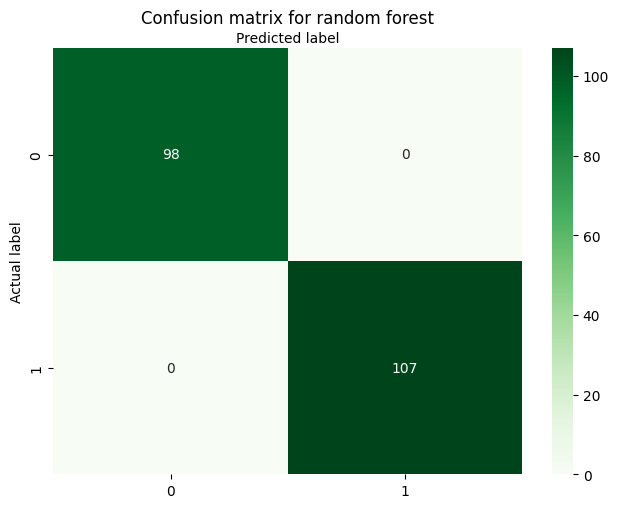

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

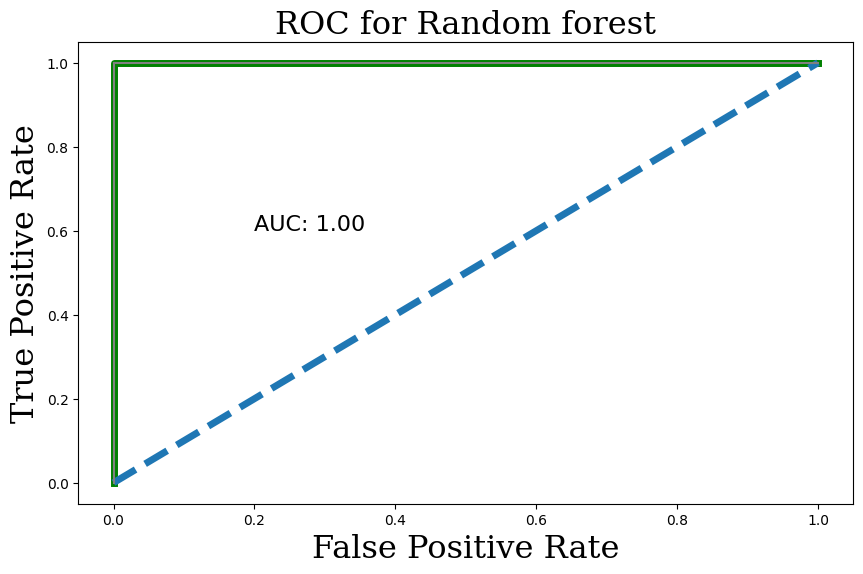

In [30]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
font={'family':'serif','size':23,'color':'black'}
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Random forest',fontdict=font)
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate',fontdict=font)
plt.ylabel('True Positive Rate',fontdict=font)
plt.show()


In [31]:
print('KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score_logreg)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

KNeighborsClassifier
Training Score: 0.8634146341463415
Testing Score: 0.7463414634146341
   Predicted
0          1
1          0
2          0
3          1
4          0
% of people predicted with heart-disease: 0.5024390243902439
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        98
           1       0.77      0.74      0.75       107

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



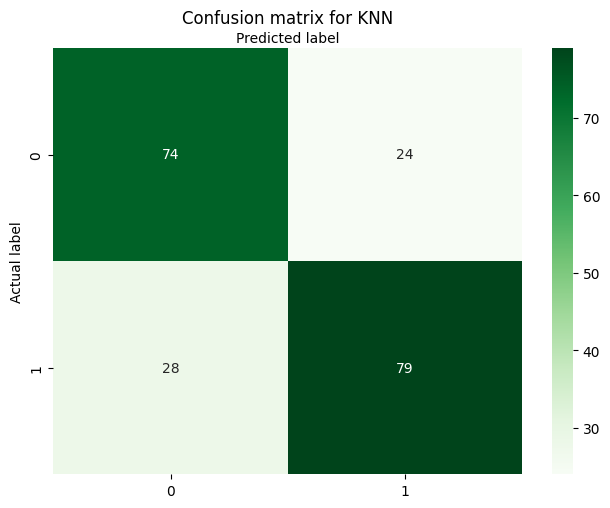

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for KNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

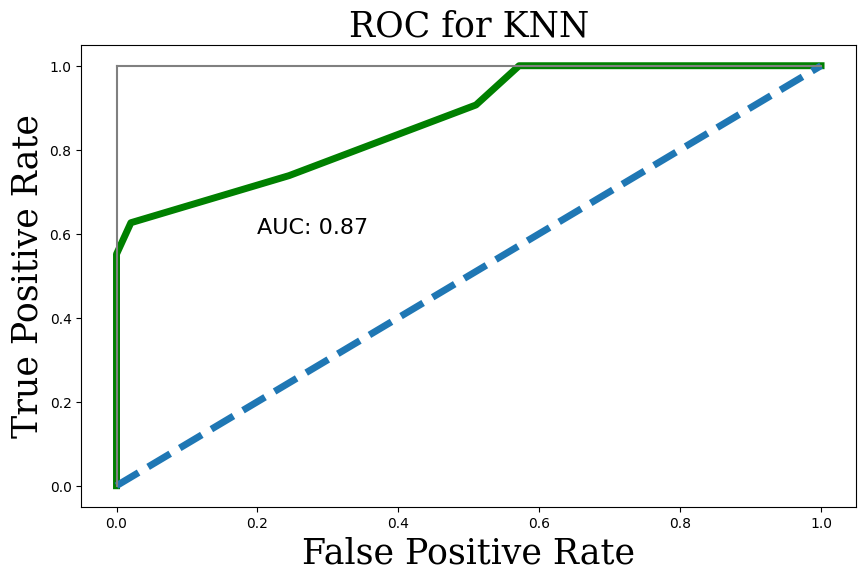

In [33]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
font={'family':'serif','size':25,'color':'black'}
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for KNN',fontdict=font)
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate',fontdict=font)
plt.ylabel('True Positive Rate',fontdict=font)
plt.show()

In [34]:

#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import train_test_split
#X=df.drop('target',axis=1)
#y=df.target
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)
#param_GBC={
 #   'n_estimators':[10,50,100],
  #  'learning_rate':[0.01,0.1,1,10]
#}
#param_RF={
 #   'n_estimators':[50,100,200],
    #'max_depth':[2,4,6]
#}
#model_GBC=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_GBC,cv=5,scoring='accuracy')
#model_GBC.fit(X_train,y_train)

In [35]:
print('Gradient Boosting Classifier')
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score_logreg)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_gnc = score
out_gnc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Gradient Boosting Classifier
Training Score: 0.8634146341463415
Testing Score: 0.9902439024390244
   Predicted
0          1
1          0
2          0
3          1
4          0
% of people predicted with heart-disease: 0.5317073170731708
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       0.98      1.00      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [36]:
#GBCModel=model_GBC.best_estimator_
#GBCModel.score(X_test,y_test)

In [37]:
print('Gradient Boosting classifier')
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_gfc = score
out_gfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Gradient Boosting classifier
Training Score: 0.9939024390243902
Testing Score: 0.9902439024390244
   Predicted
0          1
1          0
2          0
3          1
4          0
% of people predicted with heart-disease: 0.5317073170731708
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       0.98      1.00      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



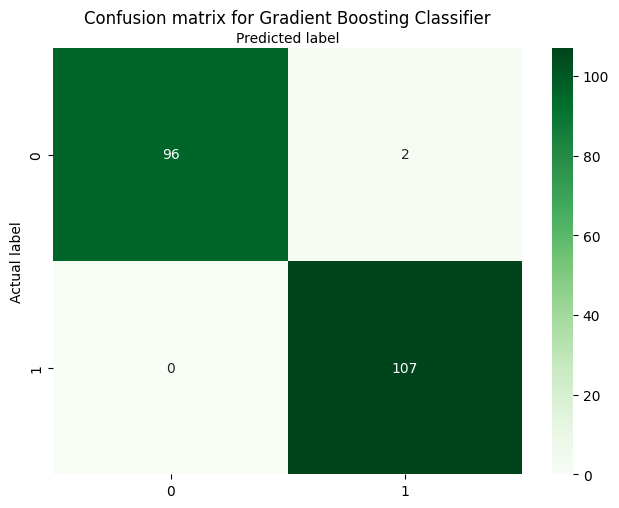

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Gradient Boosting Classifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

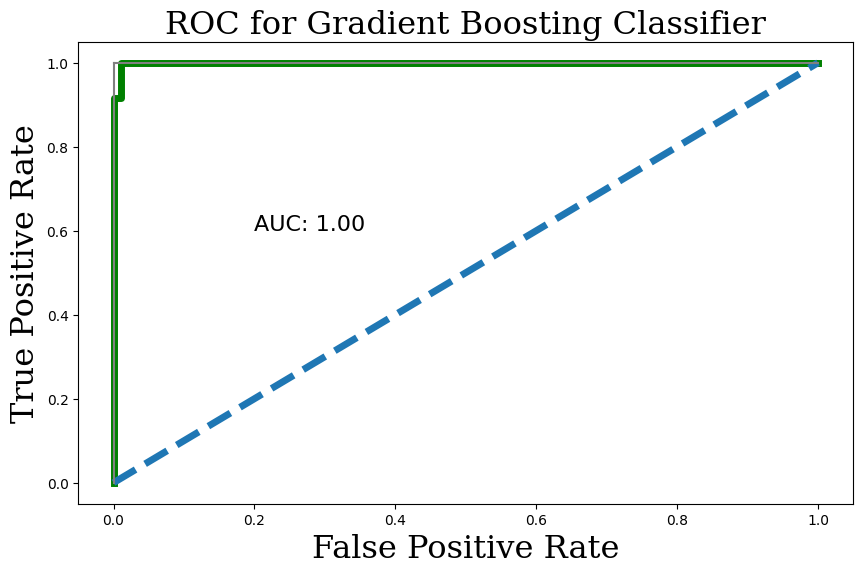

In [39]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
font={'family':'serif','size':23,'color':'black'}
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Gradient Boosting Classifier',fontdict=font)
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate',fontdict=font)
plt.ylabel('True Positive Rate',fontdict=font)
plt.show()

In [40]:
print('Support Vector Machine')
from sklearn.svm import SVC
model = SVC() # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_sfc = score
out_sfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Support Vector Machine
Training Score: 0.7024390243902439
Testing Score: 0.7463414634146341
   Predicted
0          1
1          0
2          1
3          1
4          0
% of people predicted with heart-disease: 0.5804878048780487
              precision    recall  f1-score   support

           0       0.77      0.67      0.72        98
           1       0.73      0.81      0.77       107

    accuracy                           0.75       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.75      0.75      0.74       205



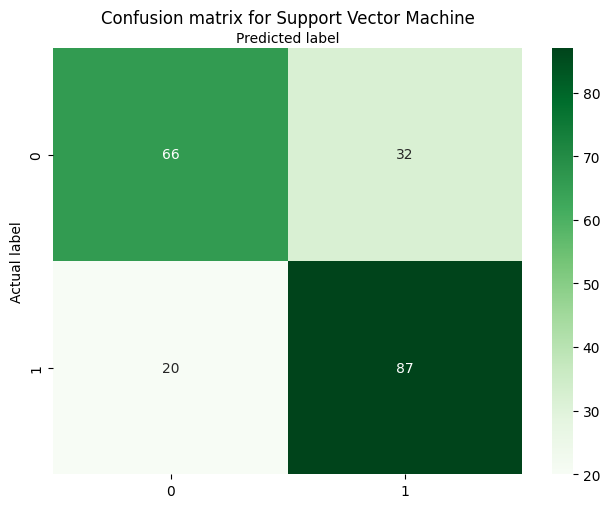

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Support Vector Machine')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Support Vector Machine')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

AttributeError: predict_proba is not available when probability=False

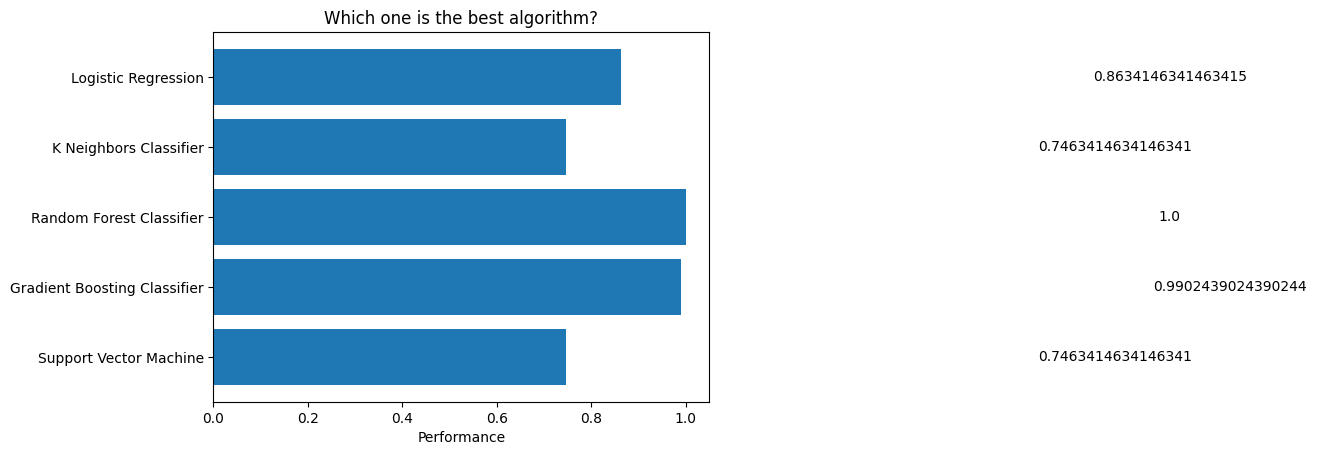

In [43]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier','Support Vector Machine' )
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_knc, score_rfc, score_gfc ,score_sfc) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

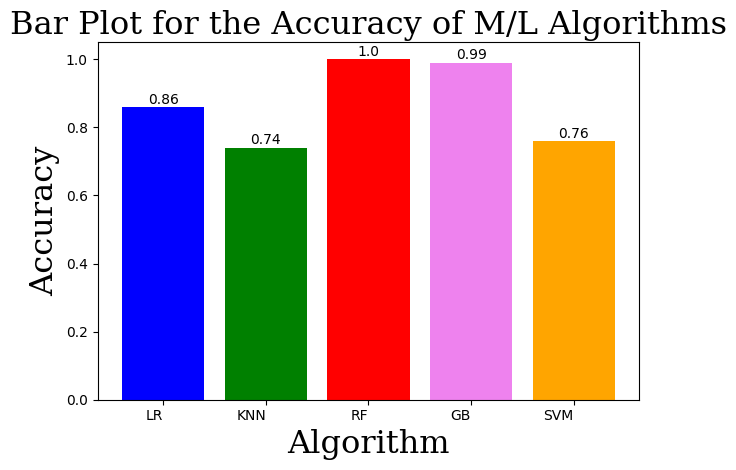

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming scores are stored in these variables
score_logreg = 0.86
score_knc = 0.74
score_rfc = 1.0
score_gfc = 0.99
score_svc = 0.76

# List of algorithms and their corresponding scores
algorithms = ['LR', 'KNN', 'RF', 'GB', 'SVM']
scores = [score_logreg, score_knc, score_rfc, score_gfc, score_svc]
colors = ['blue', 'green', 'red', 'violet', 'orange']

# Set up the bar graph
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(algorithms))

# Plot vertical bar graph
ax.bar(y_pos, scores, align='center',color=colors)

# Set the x-axis ticks to the algorithm names
ax.set_xticks(y_pos)
ax.set_xticklabels(algorithms, rotation=0, ha='right')
font={'family':'serif','size':23,'color':'black'}
# Set labels and title
ax.set_ylabel('Accuracy',fontdict=font)
ax.set_xlabel('Algorithm',fontdict=font)
ax.set_title('Bar Plot for the Accuracy of M/L Algorithms',fontdict=font)

# Add text labels for each bar
for i, v in enumerate(scores):
    ax.text(i, v + 0.01, str(v), color='black', ha='center', fontweight='normal')

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [45]:
score = score_logreg
output = out_logreg
print("Logistic Regression!", score)
if score_gfc > score:
    score = score_gfc
    output = out_gfc
    print("Gradient Boostin Classifier!", score)
if score_rfc > score:
    score = score_rfc
    output = out_rfc
    print("Random Forest Classifier!", score)
if score_knc > score:
    score = score_knc
    output = out_knc
    print("K Neighbors Classifier!", score)
if score_sfc > score:
    score = score_sfc
    output = out_sfc
    print("Support Vector Machine!", score)    

Logistic Regression! 0.86
Gradient Boostin Classifier! 0.99
Random Forest Classifier! 1.0


In [46]:
results=pd.DataFrame(columns=['score'])
results.loc['Logistic Regression']=[score_logreg]
results.loc['Gradient BoostingClassifier']=[score_gfc]
results.loc['Random Forest Classifier']=[score_rfc]
results.loc['K-Neighbors Classifier']=[score_knc]
results.loc['Support Vector Machine']=[score_sfc]

In [47]:
results.sort_values('score',ascending=False).style.background_gradient(cmap='Greens',subset=['score'])

,score
Random Forest Classifier,1.000000
Gradient BoostingClassifier,0.990000
Logistic Regression,0.860000
Support Vector Machine,0.746341
K-Neighbors Classifier,0.740000


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate precision for each class
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Individual precision for 'Heart Disease' class
precision_heart_disease = report['Heart Disease']['precision']

print(f"Individual Precision for Heart Disease: {precision_heart_disease:.2f}")

# Print the full classification report
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease']))


Individual Precision for Heart Disease: 0.75
               precision    recall  f1-score   support

   No Disease       0.85      0.74      0.79       159
Heart Disease       0.75      0.87      0.81       149

     accuracy                           0.80       308
    macro avg       0.80      0.80      0.80       308
 weighted avg       0.81      0.80      0.80       308



In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate F1-score for each class
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Individual F1-score for 'Heart Disease' class
f1_score_heart_disease = report['Heart Disease']['f1-score']

print(f"Individual F1-score for Heart Disease: {f1_score_heart_disease:.2f}")

# Print the full classification report
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease']))


Individual F1-score for Heart Disease: 0.81
               precision    recall  f1-score   support

   No Disease       0.85      0.74      0.79       159
Heart Disease       0.75      0.87      0.81       149

     accuracy                           0.80       308
    macro avg       0.80      0.80      0.80       308
 weighted avg       0.81      0.80      0.80       308



In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate recall for each class
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Individual recall for 'Heart Disease' class
recall_heart_disease = report['Heart Disease']['recall']

print(f"Individual Recall for Heart Disease: {recall_heart_disease:.2f}")

# Print the full classification report
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease']))


Individual Recall for Heart Disease: 0.87
               precision    recall  f1-score   support

   No Disease       0.85      0.74      0.79       159
Heart Disease       0.75      0.87      0.81       149

     accuracy                           0.80       308
    macro avg       0.80      0.80      0.80       308
 weighted avg       0.81      0.80      0.80       308



In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Support for 'Heart Disease' class
support_heart_disease = report['Heart Disease']['support']

print(f"Support for Heart Disease: {support_heart_disease}")


Support for Heart Disease: 149.0


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Precision for 'Heart Disease' class
precision_heart_disease = report['Heart Disease']['precision']

# Recall for 'Heart Disease' class
recall_heart_disease = report['Heart Disease']['recall']

# F1-score for 'Heart Disease' class
f1_score_heart_disease = report['Heart Disease']['f1-score']

# Support for 'Heart Disease' class
support_heart_disease = report['Heart Disease']['support']

print(f"Precision for Heart Disease: {precision_heart_disease:.2f}")
print(f"Recall for Heart Disease: {recall_heart_disease:.2f}")
print(f"F1-score for Heart Disease: {f1_score_heart_disease:.2f}")
print(f"Support for Heart Disease: {support_heart_disease}")


Precision for Heart Disease: 1.00
Recall for Heart Disease: 0.96
F1-score for Heart Disease: 0.98
Support for Heart Disease: 149.0


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Precision for 'Heart Disease' class
precision_heart_disease = report['Heart Disease']['precision']

# Recall for 'Heart Disease' class
recall_heart_disease = report['Heart Disease']['recall']

# F1-score for 'Heart Disease' class
f1_score_heart_disease = report['Heart Disease']['f1-score']

# Support for 'Heart Disease' class
support_heart_disease = report['Heart Disease']['support']

print(f"Precision for Heart Disease: {precision_heart_disease:.2f}")
print(f"Recall for Heart Disease: {recall_heart_disease:.2f}")
print(f"F1-score for Heart Disease: {f1_score_heart_disease:.2f}")
print(f"Support for Heart Disease: {support_heart_disease}")


Precision for Heart Disease: 0.95
Recall for Heart Disease: 0.95
F1-score for Heart Disease: 0.95
Support for Heart Disease: 149.0


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the SVM model
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Precision for 'Heart Disease' class
precision_heart_disease = report['Heart Disease']['precision']

# Recall for 'Heart Disease' class
recall_heart_disease = report['Heart Disease']['recall']

# F1-score for 'Heart Disease' class
f1_score_heart_disease = report['Heart Disease']['f1-score']

# Support for 'Heart Disease' class
support_heart_disease = report['Heart Disease']['support']

print(f"Precision for Heart Disease: {precision_heart_disease:.2f}")
print(f"Recall for Heart Disease: {recall_heart_disease:.2f}")
print(f"F1-score for Heart Disease: {f1_score_heart_disease:.2f}")
print(f"Support for Heart Disease: {support_heart_disease}")


Precision for Heart Disease: 0.65
Recall for Heart Disease: 0.72
F1-score for Heart Disease: 0.68
Support for Heart Disease: 149.0


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Precision for 'Heart Disease' class
precision_heart_disease = report['Heart Disease']['precision']

# Recall for 'Heart Disease' class
recall_heart_disease = report['Heart Disease']['recall']

# F1-score for 'Heart Disease' class
f1_score_heart_disease = report['Heart Disease']['f1-score']

# Support for 'Heart Disease' class
support_heart_disease = report['Heart Disease']['support']

print(f"Precision for Heart Disease: {precision_heart_disease:.2f}")
print(f"Recall for Heart Disease: {recall_heart_disease:.2f}")
print(f"F1-score for Heart Disease: {f1_score_heart_disease:.2f}")
print(f"Support for Heart Disease: {support_heart_disease}")


Precision for Heart Disease: 0.69
Recall for Heart Disease: 0.73
F1-score for Heart Disease: 0.71
Support for Heart Disease: 149.0


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Precision for 'Heart Disease' class
precision_heart_disease = report['Heart Disease']['precision']

# Recall for 'Heart Disease' class
recall_heart_disease = report['Heart Disease']['recall']

# F1-score for 'Heart Disease' class
f1_score_heart_disease = report['Heart Disease']['f1-score']

# Support for 'Heart Disease' class
support_heart_disease = report['Heart Disease']['support']

print(f"Precision for Heart Disease: {precision_heart_disease:.2f}")
print(f"Recall for Heart Disease: {recall_heart_disease:.2f}")
print(f"F1-score for Heart Disease: {f1_score_heart_disease:.2f}")
print(f"Support for Heart Disease: {support_heart_disease}")


Precision for Heart Disease: 1.00
Recall for Heart Disease: 0.96
F1-score for Heart Disease: 0.98
Support for Heart Disease: 149.0


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Step 6: Calculate specificity and prevalence
specificity = tn / (tn + fp)
prevalence = (tp + fn) / (tp + tn + fp + fn)

print(f"Specificity: {specificity:.2f}")
print(f"Prevalence: {prevalence:.2f}")


Specificity: 0.74
Prevalence: 0.48


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Precision for 'Heart Disease' class
precision_heart_disease = report['Heart Disease']['precision']

# Recall for 'Heart Disease' class
recall_heart_disease = report['Heart Disease']['recall']

# F1-score for 'Heart Disease' class
f1_score_heart_disease = report['Heart Disease']['f1-score']

# Support for 'Heart Disease' class
support_heart_disease = report['Heart Disease']['support']

print(f"Precision for Heart Disease: {precision_heart_disease:.2f}")
print(f"Recall for Heart Disease: {recall_heart_disease:.2f}")
print(f"F1-score for Heart Disease: {f1_score_heart_disease:.2f}")
print(f"Support for Heart Disease: {support_heart_disease}")


Precision for Heart Disease: 0.69
Recall for Heart Disease: 0.73
F1-score for Heart Disease: 0.71
Support for Heart Disease: 149.0


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the SVM model
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Precision for 'Heart Disease' class
precision_heart_disease = report['Heart Disease']['precision']

# Recall for 'Heart Disease' class
recall_heart_disease = report['Heart Disease']['recall']

# F1-score for 'Heart Disease' class
f1_score_heart_disease = report['Heart Disease']['f1-score']

# Support for 'Heart Disease' class
support_heart_disease = report['Heart Disease']['support']

print(f"Precision for Heart Disease: {precision_heart_disease:.2f}")
print(f"Recall for Heart Disease: {recall_heart_disease:.2f}")
print(f"F1-score for Heart Disease: {f1_score_heart_disease:.2f}")
print(f"Support for Heart Disease: {support_heart_disease}")


Precision for Heart Disease: 0.65
Recall for Heart Disease: 0.72
F1-score for Heart Disease: 0.68
Support for Heart Disease: 149.0


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease'], output_dict=True)

# Precision for 'Heart Disease' class
precision_heart_disease = report['Heart Disease']['precision']

# Recall for 'Heart Disease' class
recall_heart_disease = report['Heart Disease']['recall']

# F1-score for 'Heart Disease' class
f1_score_heart_disease = report['Heart Disease']['f1-score']

# Support for 'Heart Disease' class
support_heart_disease = report['Heart Disease']['support']

print(f"Precision for Heart Disease: {precision_heart_disease:.2f}")
print(f"Recall for Heart Disease: {recall_heart_disease:.2f}")
print(f"F1-score for Heart Disease: {f1_score_heart_disease:.2f}")
print(f"Support for Heart Disease: {support_heart_disease}")


Precision for Heart Disease: 0.95
Recall for Heart Disease: 0.95
F1-score for Heart Disease: 0.95
Support for Heart Disease: 149.0


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and train the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42)
}

for name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the labels on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate specificity and prevalence
    specificity = tn / (tn + fp)
    prevalence = (tp + fn) / (tp + tn + fp + fn)
    
    print(f"Classifier: {name}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Prevalence: {prevalence:.2f}")
    print()


Classifier: Logistic Regression
Specificity: 0.74
Prevalence: 0.48

Classifier: Random Forest
Specificity: 1.00
Prevalence: 0.48

Classifier: K-Nearest Neighbors
Specificity: 0.70
Prevalence: 0.48

Classifier: Support Vector Machine
Specificity: 0.63
Prevalence: 0.48



In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict the labels on the testing set
y_pred = model.predict(X_test)

# Step 5: Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Step 6: Calculate specificity and prevalence
specificity = tn / (tn + fp)
prevalence = (tp + fn) / (tp + tn + fp + fn)

print(f"Specificity: {specificity:.2f}")
print(f"Prevalence: {prevalence:.2f}")


Specificity: 0.95
Prevalence: 0.48


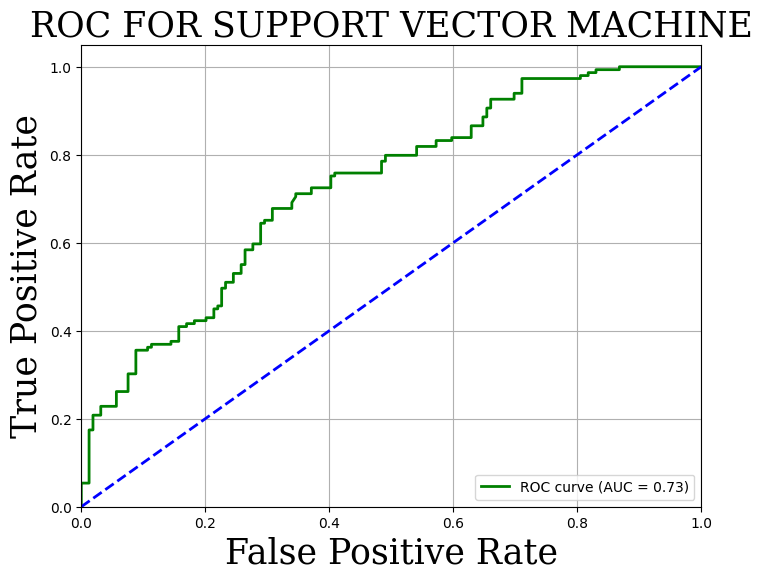

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Replace 'heart_disease.csv' with your actual dataset path
data = pd.read_csv('heart.csv')

# Assume the target variable is named 'target' and features are all other columns
X = data.drop('target', axis=1)
y = data['target']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the SVM model
model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict the probability scores on the testing set
y_scores = model.predict_proba(X_test)[:, 1]

# Step 5: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Step 6: Plot ROC curve
plt.figure(figsize=(8, 6))
font={'family':'serif','size':25,'color':'black'}
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontdict=font)
plt.ylabel('True Positive Rate',fontdict=font)
plt.title('ROC FOR SUPPORT VECTOR MACHINE',fontdict=font)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
# Assume the dataset is in a CSV file named 'heart_disease.csv'
# with the target variable named 'target' and features in other columns
data = pd.read_csv('heart.csv')

# Preprocess the data
# Here we assume the data needs no further preprocessing. Modify as needed.
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.


SyntaxError: incomplete input (301936776.py, line 36)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
font={'family':'serif','size':23,'color':'black'}
# Load the dataset
data = pd.read_csv('heart.csv')

# Preprocess the data
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'RF': RandomForestClassifier(n_estimators=100, random_state=42),
    'GB': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
model_names = []
accuracies = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(accuracy)
    print(f'{name} Accuracy: {accuracy:.4f}')

# Plot the comparison bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'violet', 'cyan'])
plt.xlabel('ALGORITHMS',fontdict=font)
plt.ylabel('ACCURACY',fontdict=font)
plt.title('Accuracy Measuring',fontdict=font)
plt.ylim([0.5, 1.0])  # Assuming accuracies are above 50%
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target' is the column with 0 and 1 values
# Example DataFrame creation for demonstration (remove this if you already have df loaded)
# df = pd.read_csv('heart_disease.csv')

# Define the font for the title
font = {'family': 'serif', 'size': 23, 'color': 'black'}

# Set Seaborn style and font scale
sns.set(font_scale=2.2)
sns.set_style('whitegrid')

# Create the countplot
ax = sns.countplot(x='target', data=df, palette='RdBu_r')

# Update the x-axis tick labels to show 'No Heart Disease' and 'Heart Disease'
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])

# Set the title with the defined font
plt.title('Heart Disease v/s No Heart Disease', fontdict=font)

# Show the plot
plt.show()


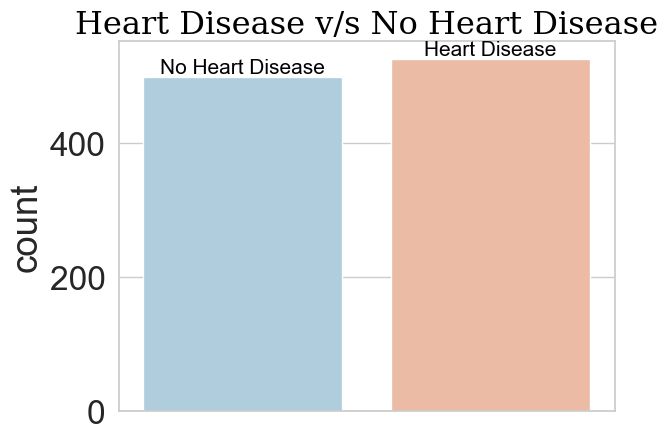

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target' is the column with 0 and 1 values
# Example DataFrame creation for demonstration (remove this if you already have df loaded)
# df = pd.read_csv('heart_disease.csv')

# Define the font for the title
font = {'family': 'serif', 'size': 23, 'color': 'black'}

# Set Seaborn style and font scale
sns.set(font_scale=2.2)
sns.set_style('whitegrid')

# Create the countplot
ax = sns.countplot(x='target', data=df, palette='RdBu_r')

# Remove the x-axis label
ax.set_xlabel('')

# Add labels inside the bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    if p.get_x() < 0.5:
        label = 'No Heart Disease'
    else:
        label = 'Heart Disease'
    ax.annotate(label, (x, count), ha='center', va='bottom', fontsize=15, color='black')

# Set the title with the defined font
plt.title('Heart Disease v/s No Heart Disease', fontdict=font)

# Remove the x-axis tick labels
ax.set_xticks([])

# Show the plot
plt.show()


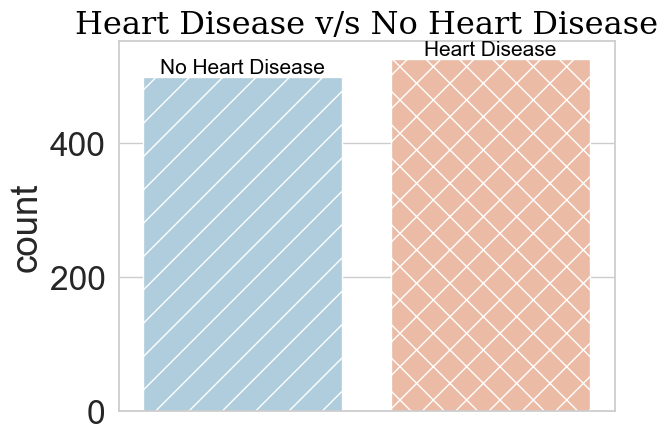

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target' is the column with 0 and 1 values
# Example DataFrame creation for demonstration (remove this if you already have df loaded)
# df = pd.read_csv('heart_disease.csv')

# Define the font for the title
font = {'family': 'serif', 'size': 23, 'color': 'black'}

# Set Seaborn style and font scale
sns.set(font_scale=2.2)
sns.set_style('whitegrid')

# Create the countplot
ax = sns.countplot(x='target', data=df, palette='RdBu_r')

# Remove the x-axis label
ax.set_xlabel('')

# Add patterns to the bars
patterns = ['/', 'x']  # Patterns to use for the bars
for bar, pattern in zip(ax.patches, patterns):
    bar.set_hatch(pattern)

# Add labels inside the bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    if p.get_x() < 0.5:
        label = 'No Heart Disease'
    else:
        label = 'Heart Disease'
    ax.annotate(label, (x, count), ha='center', va='bottom', fontsize=15, color='black')

# Set the title with the defined font
plt.title('Heart Disease v/s No Heart Disease', fontdict=font)

# Remove the x-axis tick labels
ax.set_xticks([])

# Show the plot
plt.show()


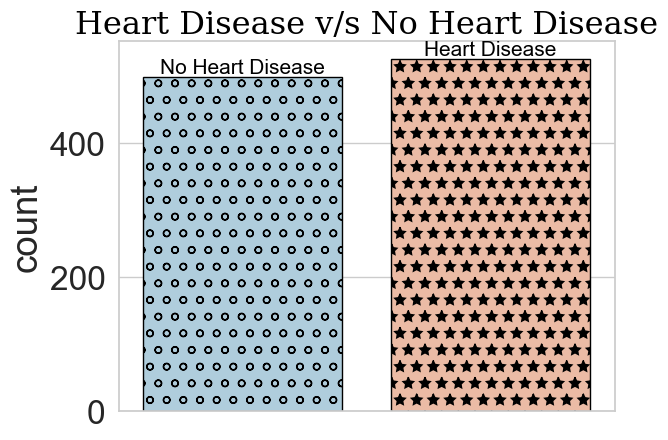

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target' is the column with 0 and 1 values
# Example DataFrame creation for demonstration (remove this if you already have df loaded)
# df = pd.read_csv('heart_disease.csv')

# Define the font for the title
font = {'family': 'serif', 'size': 23, 'color': 'black'}

# Set Seaborn style and font scale
sns.set(font_scale=2.2)
sns.set_style('whitegrid')

# Create the countplot
ax = sns.countplot(x='target', data=df, palette='RdBu_r')

# Remove the x-axis label
ax.set_xlabel('')

# Add patterns to the bars
patterns = ['o', '*']  # Patterns to use for the bars (circle, star)
for bar, pattern in zip(ax.patches, patterns):
    bar.set_hatch(pattern)
    bar.set_edgecolor('black')  # Set the border color for the bars

# Add labels inside the bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    if p.get_x() < 0.5:
        label = 'No Heart Disease'
        
    else:
        label = 'Heart Disease'
        
    ax.annotate(label, (x, count), ha='center', va='bottom', fontsize=15, color='black')

# Set the title with the defined font
plt.title('Heart Disease v/s No Heart Disease', fontdict=font)

# Remove the x-axis tick labels
ax.set_xticks([])

# Show the plot
plt.show()


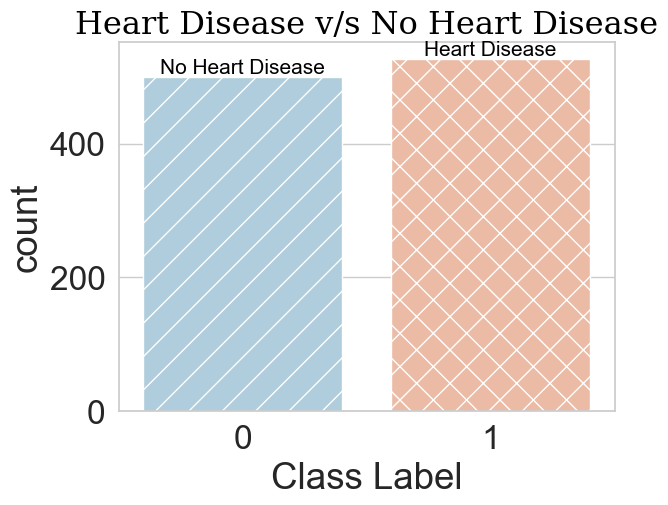

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target' is the column with 0 and 1 values
# Example DataFrame creation for demonstration (remove this if you already have df loaded)
# df = pd.read_csv('heart_disease.csv')

# Define the font for the title
font = {'family': 'serif', 'size': 23, 'color': 'black'}

# Set Seaborn style and font scale
sns.set(font_scale=2.2)
sns.set_style('whitegrid')

# Create the countplot
ax = sns.countplot(x='target', data=df, palette='RdBu_r')

# Add patterns to the bars
patterns = ['/', 'x']  # Patterns to use for the bars
for bar, pattern in zip(ax.patches, patterns):
    bar.set_hatch(pattern)

# Add labels inside the bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    if p.get_x() < 0.5:
        label = 'No Heart Disease'
    else:
        label = 'Heart Disease'
    ax.annotate(label, (x, count), ha='center', va='bottom', fontsize=15, color='black')

# Set the title with the defined font
plt.title('Heart Disease v/s No Heart Disease', fontdict=font)

# Label the x-axis as 'Class Label'
ax.set_xlabel('Class Label')

# Set x-axis ticks to 0 and 1
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])

# Show the plot
plt.show()
